<a href="https://colab.research.google.com/github/rajashekar/colab/blob/main/pydomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


# Data analysis

In [2]:
%pwd

'/content'

In [4]:
%cp /content/drive/MyDrive/Colab/pydomains/data/domain_final.zip /tmp

In [5]:
%cd /tmp

/tmp


In [8]:
!unzip domain_final.zip

Archive:  domain_final.zip
  inflating: domain_final.csv        


In [ ]:
# !gzip -d shallalist.gz

In [10]:
!wc -l domain_final.csv

61326 domain_final.csv


In [11]:
df = pd.read_csv('domain_final.csv')

In [12]:
df.head()

,text,domain_names,cat_name
0,total home about right now assorted chocolate ...,kizito,shopping
1,rule there is of no curiosity the june biggest...,rule--34.blogspot,porn
2,home mission statement of faith login harvest ...,agapeharvestchurch,religion
3,western get instant and send money on the send...,westernunion.co,finance/other
4,new view more view more new view more alfa alf...,alfaromeo-jp,automobile/cars


In [13]:
df['cat_name'].unique()

array(['shopping', 'porn', 'religion', 'finance/other', 'automobile/cars',
       'forum', 'gamble', 'news', 'recreation/sports',
       'recreation/travel', 'hobby/games-online', 'education/schools',
       'music', 'chat', 'hobby/pets', 'finance/moneylending',
       'finance/insurance', 'finance/banking', 'radiotv',
       'recreation/martialarts', 'politics', 'hobby/games-misc',
       'automobile/bikes', 'science/chemistry', 'drugs', 'adv', 'webmail',
       'downloads', 'webradio', 'hospitals', 'government', 'warez',
       'redirector', 'recreation/humor', 'hobby/cooking',
       'recreation/restaurants', 'dating', 'dynamic', 'models',
       'jobsearch', 'alcohol', 'recreation/wellness',
       'finance/realestate', 'movies', 'spyware', 'military', 'weapons',
       'automobile/planes', 'homestyle', 'library', 'fortunetelling',
       'tracker', 'remotecontrol', 'sex/lingerie', 'violence',
       'searchengines', 'ringtones', 'isp', 'aggressive',
       'automobile/boats', 'ima

In [14]:
len(df['cat_name'].unique())

74

In [15]:
df.groupby('cat_name').count()

,text,domain_names
cat_name,,
adv,1920,1920
aggressive,91,91
alcohol,336,336
anonvpn,50,50
automobile/bikes,312,312
...,...,...
weapons,153,153
webmail,444,444
webphone,23,23


In [16]:
df['category_codes'] = df.cat_name.astype('category').cat.codes

In [17]:
df.groupby('cat_name').count().index

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [18]:
classes = df.groupby('cat_name').count().index

In [19]:
df.groupby('category_codes').count().index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73],
           dtype='int64', name='category_codes')

In [20]:
df.loc[df['category_codes'] == 72]

,text,domain_names,cat_name,category_codes
64,toggle navigation all streaming live streaming...,wyep.streamguys,webradio,72
116,toggle search form search toggle navigation ho...,wgmuradio,webradio,72
235,listen wake up call bill and and ken coast to ...,kfiam640,webradio,72
284,are you a fan of check out the welcome to the ...,radio-locator,webradio,72
347,radio simple for simple people radio seit sind...,radiosucks,webradio,72
...,...,...,...,...
60239,home splash splash reality a da de em da me pl...,radio.musica.uol.com,webradio,72
60319,twitter home current stairway stairway with tr...,ghostlytalk,webradio,72
60465,is currently off the please check back to this...,shoutbrothershout.homestead,webradio,72
60646,skip to content no de de no listen web rock ra...,webrockradio,webradio,72


In [21]:
df.head()

,text,domain_names,cat_name,category_codes
0,total home about right now assorted chocolate ...,kizito,shopping,61
1,rule there is of no curiosity the june biggest...,rule--34.blogspot,porn,44
2,home mission statement of faith login harvest ...,agapeharvestchurch,religion,53
3,western get instant and send money on the send...,westernunion.co,finance/other,18
4,new view more view more new view more alfa alf...,alfaromeo-jp,automobile/cars,6


In [22]:
df['domain_names'] + ' ' + df['text'] 

0        kizito total home about right now assorted cho...
1        rule--34.blogspot rule there is of no curiosit...
2        agapeharvestchurch home mission statement of f...
3        westernunion.co western get instant and send m...
4        alfaromeo-jp new view more view more new view ...
                               ...                        
61320    astro.elte information staff education researc...
61321    clarkjoneskarate sign in to control panel secu...
61322    inflagranti-music news rock pop dance party di...
61323    euribor the institute about the institute disc...
61324    unsw.edu skip to main content study study expl...
Length: 61325, dtype: object

In [23]:
len_of_text = df['text'].str.split("\\s+")

In [24]:
len_of_text.str.len().max()

15481712

In [25]:
df.loc[df['cat_name'] == 'news']

,text,domain_names,cat_name,category_codes
9,listen on air bosch schedule recently top radi...,wxra945,news,41
33,music music radio par format se continuer la m...,radio.m24,news,41
39,cover letter resume is a nationally columnist ...,ariannaonline,news,41
41,league de league de a la candela y hay de al t...,rpctv,news,41
46,and specialist franco magazine test sport tag ...,giornaledellavela,news,41
...,...,...,...,...
61233,tip de van en business sport folklore register...,zwartewaterkrant,news,41
61239,listen live listen to east coast gold big dona...,ecr.co,news,41
61261,league en de el bolivia red costa el canal cha...,canal7.com,news,41
61312,na a o na se se za a sa ale po na v die do v a...,noveslovo,news,41


# Split Data

In [45]:
X = (df['domain_names'] + ' ' + df['text']).values
y = df['category_codes'].values

In [46]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [47]:
X_train.size

42927

In [48]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([1337,   57,  238,   41,  210,   96,  718,  174, 2276,   37,  511,
         481,  581,  260, 2541, 1546,  646,  353,  153,  433,   81,  242,
        1480, 1274,  183,  101,  204,  499, 1831,  257, 1714,   70,  526,
         113,  201,  964,   52,   52,  345, 1095, 1420, 3603,   23,  485,
        1905, 1056,  203,  490,  377, 2308, 2150,  139,  220, 1380,   14,
          67,  270,   59,  111,   38,  130,  956,  111,  253,  200,   38,
          90,   20,  104,  112,  311,   13,  259,   39]))

In [49]:
X_rem.size

18398

In [50]:
np.unique(y_rem, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([ 583,   34,   98,    9,  102,   28,  328,   85,  969,    9,  222,
         229,  223,  100, 1107,  685,  298,  145,   76,  165,   37,   95,
         640,  583,   81,   37,   80,  235,  817,   98,  769,   22,  257,
          29,   95,  378,   25,   17,  169,  464,  618, 1523,   13,  206,
         747,  448,   92,  222,  170,  946,  912,   51,   96,  591,    3,
          18,  140,   20,   46,   17,   59,  392,   47,  107,   74,   15,
          34,    7,   48,   41,  133,   10,  111,   18]))

In [51]:
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

In [52]:
X_val.size

9199

In [53]:
np.unique(y_val, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73], dtype=int8),
 array([291,  15,  50,   3,  59,  18, 165,  44, 479,   4, 111, 111, 102,
         46, 536, 350, 134,  72,  46,  94,  16,  39, 309, 289,  41,  24,
         41, 123, 375,  53, 405,  10, 133,  14,  50, 200,  14,   9,  93,
        221, 309, 770,   5,  99, 368, 227,  47, 109,  84, 482, 472,  26,
         61, 304,  14,  63,   9,  22,  11,  31, 184,  24,  48,  38,   5,
         18,   5,  23,  23,  68,   5,  45,  11]))

In [54]:
X_test.size

9199

In [55]:
np.unique(y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73], dtype=int8),
 array([292,  19,  48,   6,  43,  10, 163,  41, 490,   5, 111, 118, 121,
         54, 571, 335, 164,  73,  30,  71,  21,  56, 331, 294,  40,  13,
         39, 112, 442,  45, 364,  12, 124,  15,  45, 178,  11,   8,  76,
        243, 309, 753,   8, 107, 379, 221,  45, 113,  86, 464, 440,  25,
         35, 287,   3,   4,  77,  11,  24,   6,  28, 208,  23,  59,  36,
         10,  16,   2,  25,  18,  65,   5,  66,   7]))

In [56]:
X_train[10000]

'bmwparklane menu control park lane book a test drive book a service home finance and used business and contact us about the series coupe is find out close welcome to park the flagship offering nationwide used vehicle search your used vehicle search your new car search now used car search now news new car find out more martin general manager the journey to your next as simple and convenient for you as news park lane read more promotion the active tourer be one of the first to book a test and receive a voucher courtesy of red letter read more discover the of a electric or hybrid vehicle and calculate your potential fuel find out more explore our with our range now boasting more than ever finding the perfect for you never been find out more your whether a an accident a new accessory or simply advice you we can how can we help you business and fleet business company car a strong range of and thanks to highly and comprehensive combined with low running as a result of fuel and find out more

In [57]:
y_train[10000]

6

In [58]:
df[df['domain_names'].str.contains('bmwparklane')]

,text,domain_names,cat_name,category_codes
37128,menu control park lane book a test drive book ...,bmwparklane,automobile/cars,6


In [59]:
y_train = to_categorical(y_train, len(df['category_codes'].unique()))
y_val = to_categorical(y_val, len(df['category_codes'].unique()))
y_test = to_categorical(y_test, len(df['category_codes'].unique()))

In [60]:
y_train[10000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

# Creating Dataset

In [61]:
BATCH_SIZE = 64
BUFFER_SIZE = 600000

In [62]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [63]:
text_batch, label_batch = next(iter(train_dataset))
site_name, first_label = text_batch[0], label_batch[0]
print("Name", site_name)
print("Label", first_label)

Name tf.Tensor(b'sporn skip to content close menu shop our story which harness is best for your log in twitter cart translation for safety please allow extra time for to be particularly international shop our story which harness is best for your log in search site navigation cart search translation translation does your dog pull the most popular and best selling pull control since shop now stop the most popular and best selling pull control since shop now for the ultimate in pull control the ultimate control learn more stop the most popular and best selling pull control since shop now check out our new line of aquarium and much shop now over million sold our top view all add to cart ultimate harness from add to cart mesh from add to cart original from view all ultimate harness regular price the ultimate control dog harness is the latest addition to our line of control offering of pull control in one comfort design the dog owner several ways to humanely control their dog when on the the

# Vectorization

In [64]:
max_features = 62000
sequence_length = 5000

vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [65]:
# Make a text-only dataset (without labels), then call adapt
train_text = train_dataset.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [66]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [67]:
print("Vectorized data", vectorize_text(site_name, first_label))

Vectorized data (<tf.Tensor: shape=(1, 5000), dtype=int64, numpy=array([[42610,   671,     5, ...,     0,     0,     0]])>, <tf.Tensor: shape=(74,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)>)


In [68]:
print("1000 ---> ",vectorize_layer.get_vocabulary()[1000])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1000 --->  girl
Vocabulary size: 62000


In [69]:
train_ds = train_dataset.map(vectorize_text)
val_ds = val_dataset.map(vectorize_text)
test_ds = test_dataset.map(vectorize_text)

In [70]:
# For performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model

In [114]:
embedding_dim = 64
weight_decay = 0.001

model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(len(df['category_codes'].unique()), 
                        activation='softmax', 
                        kernel_regularizer=regularizers.L1L2(l1=weight_decay, l2=weight_decay),
                        bias_regularizer=regularizers.L2(weight_decay),
                        activity_regularizer=regularizers.L2(weight_decay))])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          3968064   
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 74)                4810      
                                                                 
Total params: 3,972,874
Trainable params: 3,972,874
Non-trainable params: 0
____________________________________________

In [115]:
model_save_filename = "model.h5"

In [116]:
batch_size = 64
epochs = 500
initial_learning_rate = 0.006



model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              metrics=['accuracy'])

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    patience = 10,
    restore_best_weights = True
)

mdlcheckpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    model_save_filename,
    monitor = 'val_accuracy',
    mode = 'max',
    verbose = 1,
    save_best_only = True
)

decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
  return lr * 1/ (1 + decay * epoch)

lrscheduler_cb = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)


In [117]:
history = model.fit(
    train_ds,
    batch_size = batch_size,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[earlystopping_cb, mdlcheckpoint_cb, lrscheduler_cb])

Epoch 1/500
667/671 [============================>.] - ETA: 0s - loss: 3.8330 - accuracy: 0.0808
Epoch 1: val_accuracy improved from -inf to 0.08381, saving model to model.h5
671/671 [==============================] - 7s 10ms/step - loss: 3.8319 - accuracy: 0.0809 - val_loss: 3.7720 - val_accuracy: 0.0838 - lr: 0.0060
Epoch 2/500
667/671 [============================>.] - ETA: 0s - loss: 3.7439 - accuracy: 0.0938
Epoch 2: val_accuracy improved from 0.08381 to 0.11262, saving model to model.h5
671/671 [==============================] - 7s 10ms/step - loss: 3.7430 - accuracy: 0.0941 - val_loss: 3.7241 - val_accuracy: 0.1126 - lr: 0.0060
Epoch 3/500
667/671 [============================>.] - ETA: 0s - loss: 3.6996 - accuracy: 0.1135
Epoch 3: val_accuracy improved from 0.11262 to 0.12338, saving model to model.h5
671/671 [==============================] - 7s 10ms/step - loss: 3.6986 - accuracy: 0.1137 - val_loss: 3.6886 - val_accuracy: 0.1234 - lr: 0.0060
Epoch 4/500
667/671 [=============

In [118]:
model = tf.keras.models.load_model(model_save_filename)

# Evaluate

In [119]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

144/144 [==============================] - 1s 3ms/step - loss: 2.8780 - accuracy: 0.4694
Loss:  2.8780357837677
Accuracy:  0.4693988561630249


# Plot

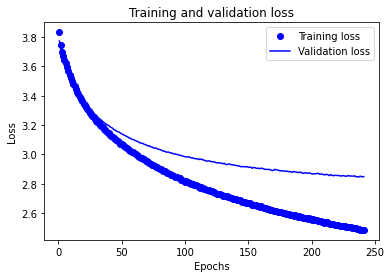

In [120]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

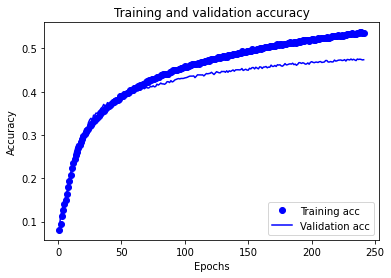

In [121]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

# Save Model

In [122]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model
])

export_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

loss, accuracy = export_model.evaluate(test_dataset)
print(accuracy)

144/144 [==============================] - 1s 8ms/step - loss: 2.8780 - accuracy: 0.4694
0.4693988561630249


# Inference

In [123]:
examples = [
    "yahoo.com",
    "forbes.com",
    "draftkings.com/",
    "pornhub.com",
    "xvideos.com",
    "google.com",
    "amazon.com",
    "facebook.com",
    "fidelity.com",
    "youtube.com",
    "youporn.com",
    "bellesa.co"
]


import requests
from bs4 import BeautifulSoup
from bs4.element import Comment

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(text):
      soup = BeautifulSoup(text, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)
      result = u" ".join(t.strip().lower() for t in visible_texts if t.strip().isalpha())
      return ' '.join(result.split())

for i in range(len(examples)):
  page = requests.get(f"https://{examples[i]}", timeout=3, headers = {"Accept-Language": "en-US"})
  text = text_from_html(page.text)
  examples[i] = examples[i].rsplit(".",1)[0] + ' ' + text

In [124]:
examples

['yahoo home mail news finance sports entertainment life search shopping mail mail mail news news finance finance sports sports entertainment entertainment life life shopping shopping politics celebrity lifestyle sports business entertainment health style science technology ads celebrity whbq politics business quartz video engadget celebrity variety deadline huffpost politics video business weather weather groningen today fri sat sun scoreboard mlb nba ncaab ncaaf nfl nhl trending yesterday today tomorrow chicago milwaukee milwaukee pittsburgh detroit minnesota aquarius aries cancer capricorn gemini leo libra pisces sagittarius scorpio taurus virgo twitter facebook instagram youtube tiktok advertise careers help feedback',
 'forbes explore billionaires innovation ai cloud cybersecurity games healthcare science sustainability leadership careers cxo education forbeswomen money fintech investing markets retirement taxes business energy manufacturing media policy retail sportsmoney transpo

In [125]:
results = export_model.predict(examples)

In [126]:
results

array([[5.22360317e-02, 2.44711206e-04, 7.64734577e-04, 2.34883642e-04,
        9.69818153e-04, 3.70745547e-04, 4.92830994e-03, 7.56277528e-04,
        1.80614404e-02, 2.76250939e-04, 1.00277190e-03, 4.30414546e-03,
        3.79682146e-03, 7.86052842e-05, 5.97446217e-07, 5.42755530e-04,
        8.82135238e-04, 8.57398612e-04, 3.07757611e-04, 2.74163787e-04,
        2.50422279e-04, 7.42333068e-04, 5.16961932e-01, 6.21202663e-02,
        2.37214568e-04, 3.84388957e-04, 7.92575825e-04, 3.31944488e-02,
        2.37043858e-01, 7.73202395e-04, 6.13784511e-03, 3.55867145e-04,
        7.30866741e-05, 5.60162007e-04, 7.76044326e-04, 1.53797810e-04,
        2.47698161e-04, 1.51563509e-04, 1.92639942e-03, 5.97889489e-03,
        8.25871539e-04, 4.62941352e-05, 1.28880522e-04, 3.20590916e-04,
        7.73494830e-03, 6.70437366e-05, 1.11087225e-03, 6.98026386e-04,
        6.30040478e-04, 7.03035295e-03, 1.30581111e-03, 6.35618751e-04,
        8.33240862e-04, 6.78727578e-04, 1.40532720e-04, 3.634030

In [127]:
probs = tf.nn.softmax(results)

In [128]:
probs

<tf.Tensor: shape=(12, 74), dtype=float32, numpy=
array([[0.01401195, 0.01330207, 0.01330899, 0.01330194, 0.01331172,
        0.01330374, 0.01336452, 0.01330888, 0.01354119, 0.01330249,
        0.01331216, 0.01335618, 0.0133494 , 0.01329986, 0.01329882,
        0.01330603, 0.01331055, 0.01331022, 0.01330291, 0.01330246,
        0.01330214, 0.01330869, 0.02230112, 0.01415114, 0.01330197,
        0.01330393, 0.01330936, 0.01374767, 0.0168562 , 0.0133091 ,
        0.01338069, 0.01330355, 0.01329979, 0.01330627, 0.01330914,
        0.01330086, 0.01330211, 0.01330083, 0.01332446, 0.01337856,
        0.0133098 , 0.01329943, 0.01330053, 0.01330308, 0.01340208,
        0.01329971, 0.0133136 , 0.0133081 , 0.0133072 , 0.01339264,
        0.01331619, 0.01330727, 0.0133099 , 0.01330784, 0.01330068,
        0.01330365, 0.01331268, 0.01330201, 0.01330658, 0.01330246,
        0.01330671, 0.01342457, 0.01330553, 0.01331094, 0.01331005,
        0.01330059, 0.01330407, 0.01330086, 0.01330546, 0.01330375

In [129]:
res_args = tf.argmax(results, 1)

In [130]:
res_args

<tf.Tensor: shape=(12,), dtype=int64, numpy=array([22, 22, 49, 22, 22, 22, 49, 22, 49, 28, 22, 28])>

In [131]:
res_args.numpy()

array([22, 22, 49, 22, 22, 22, 49, 22, 49, 28, 22, 28])

In [132]:
classes

Index(['adv', 'aggressive', 'alcohol', 'anonvpn', 'automobile/bikes',
       'automobile/boats', 'automobile/cars', 'automobile/planes', 'chat',
       'costtraps', 'dating', 'downloads', 'drugs', 'dynamic',
       'education/schools', 'finance/banking', 'finance/insurance',
       'finance/moneylending', 'finance/other', 'finance/realestate',
       'finance/trading', 'fortunetelling', 'forum', 'gamble', 'government',
       'hacking', 'hobby/cooking', 'hobby/games-misc', 'hobby/games-online',
       'hobby/gardening', 'hobby/pets', 'homestyle', 'hospitals',
       'imagehosting', 'isp', 'jobsearch', 'library', 'military', 'models',
       'movies', 'music', 'news', 'podcasts', 'politics', 'porn', 'radiotv',
       'recreation/humor', 'recreation/martialarts', 'recreation/restaurants',
       'recreation/sports', 'recreation/travel', 'recreation/wellness',
       'redirector', 'religion', 'remotecontrol', 'ringtones',
       'science/astronomy', 'science/chemistry', 'searchengines',
 

In [133]:
for i in range(len(examples)):
  print(f"{examples[i].split()[0]} : {classes[res_args[i]]}")

yahoo : forum
forbes : forum
draftkings : recreation/sports
pornhub : forum
xvideos : forum
google : forum
amazon : recreation/sports
facebook : forum
fidelity : recreation/sports
youtube : hobby/games-online
youporn : forum
bellesa : hobby/games-online


In [134]:
!ls -ltr

total 376948
-rw-r--r-- 1 root root 244626908 Apr 27 12:37 domain_final.csv
lrwxrwxrwx 1 root root        61 Apr 28 00:17 dap_multiplexer.INFO -> dap_multiplexer.d7d755732304.root.log.INFO.20220428-001701.61
srwxr-xr-x 1 root root         0 Apr 28 00:17 debugger_1oyuyx0jar
-rw-r--r-- 1 root root      1518 Apr 28 00:17 dap_multiplexer.d7d755732304.root.log.INFO.20220428-001701.61
drwxr-xr-x 3 root root      4096 Apr 28 00:27 python-languageserver-cancellation
drwx------ 2 root root      4096 Apr 28 00:27 pyright-138-yOrrozG5dlSn
drwx------ 2 root root      4096 Apr 28 00:27 pyright-138-sW2N3MFVO0TR
srw------- 1 root root         0 Apr 28 00:28 drivefs_ipc.0
srw------- 1 root root         0 Apr 28 00:28 drivefs_ipc.0_shell
drwx------ 2 root root      4096 Apr 28 00:28 initgoogle_syslog_dir.0
lrwxrwxrwx 1 root root        73 Apr 28 00:28 directoryprefetcher_binary.INFO -> directoryprefetcher_binary.d7d755732304.root.log.INFO.20220428-002828.332
-rw-r--r-- 1 root root      1567 Apr 28 00:2

In [135]:
!zip model.h5.zip model.h5

updating: model.h5 (deflated 10%)


In [136]:
%cp /tmp/model.h5.zip /content/drive/MyDrive/Colab/pydomains/data/